In [20]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import tseries
from pandas import Series

In [21]:
df = pd.read_csv('portland-oregon-average-monthly-.csv', index_col = 0)
##index_col specifies the column to use for the row labels of the dataframe
df.index.name = None
df.reset_index(inplace = True)
df.drop(df.index[114], inplace = True)

In [22]:
start = datetime.datetime.strptime("1973-01-01", "%Y-%m-%d")
date_list = [start + relativedelta(months = x) for x in range(0,114)]
df['index'] = date_list
df.set_index(['index'], inplace = True)
df.index.name = None

In [23]:
df.columns = ['riders']
df['riders'] = df.riders.apply(lambda x: int(x)*100)

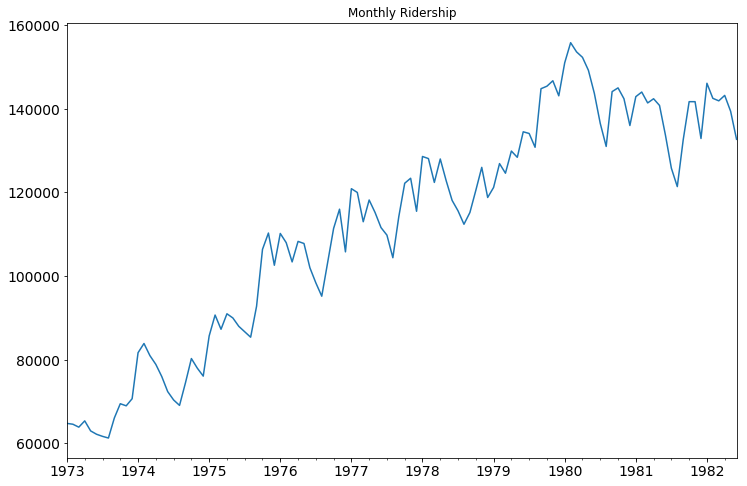

In [24]:
df.riders.plot(figsize = (12,8), title = 'Monthly Ridership', fontsize = 14)
plt.savefig('month_ridership.png', bbox_inches = 'tight')

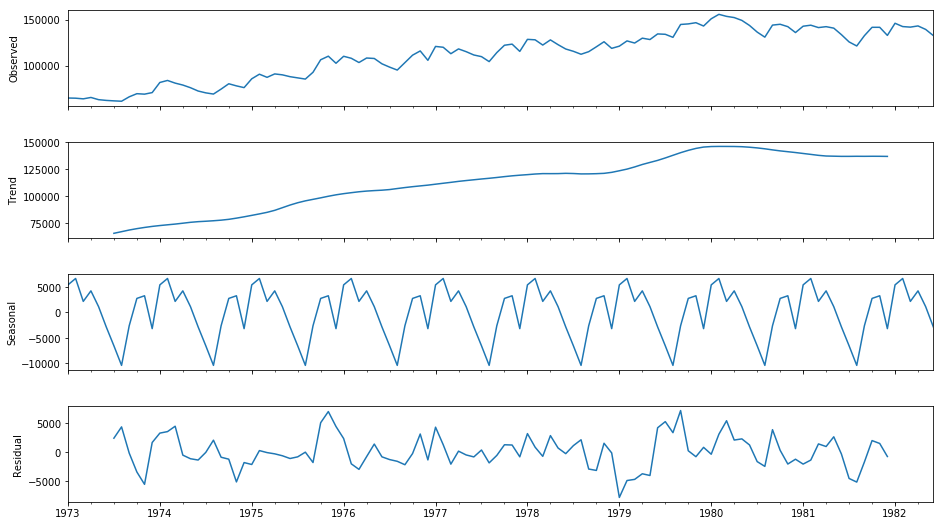

In [25]:
decomposition = seasonal_decompose(df.riders, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

The Dickey-Fuller Test is used to see if the series is stationary. Stationary series have the 
advantage of being able to use many statistcial techniques like the Law of Large Numbers and
the Central Limit Theorem.
The D-F test uses the Null Hypothesis that the series is not stationary so if H0 can be rejected(if the observed p-value < 0.05) then then series can be assumed to be stationary.

In [26]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = Series.rolling(timeseries, window=12, center=False).mean()
    rolstd = Series.rolling(timeseries, window=12, center=False).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

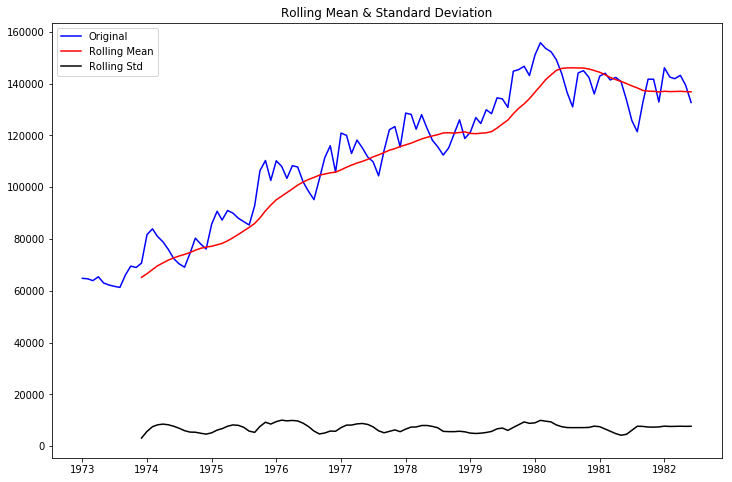

Results of Dickey-Fuller Test:
Test Statistic                  -1.536597
p-value                          0.515336
#Lags Used                      12.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64


In [27]:
test_stationarity(df.riders)

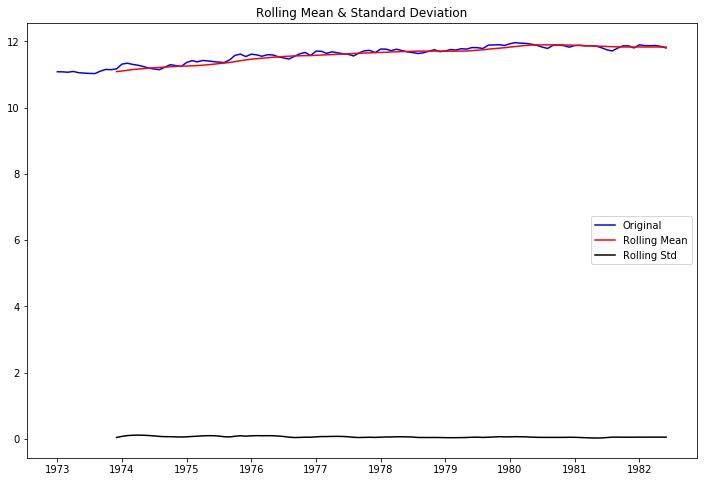

Results of Dickey-Fuller Test:
Test Statistic                  -1.677830
p-value                          0.442570
#Lags Used                      12.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64


In [28]:
df.riders_log= df.riders.apply(lambda x: np.log(x))  
test_stationarity(df.riders_log)

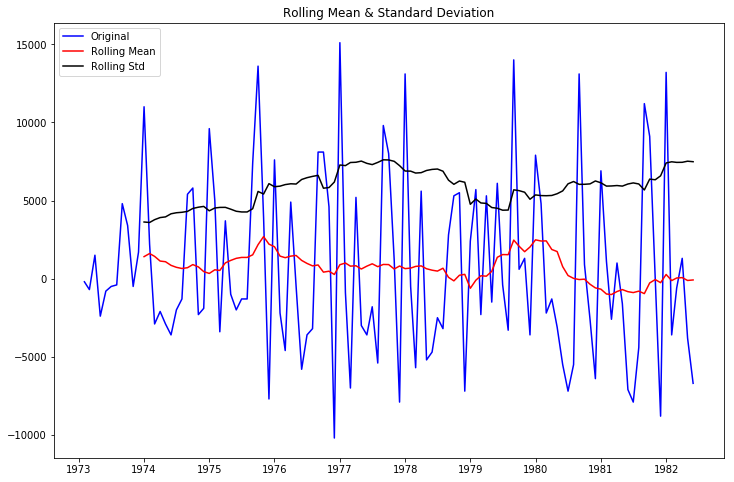

Results of Dickey-Fuller Test:
Test Statistic                  -1.938696
p-value                          0.314082
#Lags Used                      11.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64


In [29]:
df['first_difference'] = df.riders - df.riders.shift(1)  
test_stationarity(df.first_difference.dropna(inplace = False))

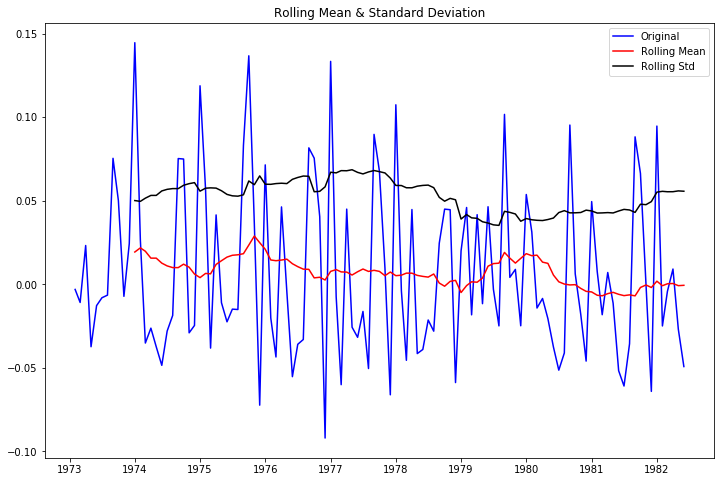

Results of Dickey-Fuller Test:
Test Statistic                  -2.047539
p-value                          0.266126
#Lags Used                      11.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64


In [30]:
df['log_first_difference'] = df.riders_log - df.riders_log.shift(1)  
test_stationarity(df.log_first_difference.dropna(inplace = False))

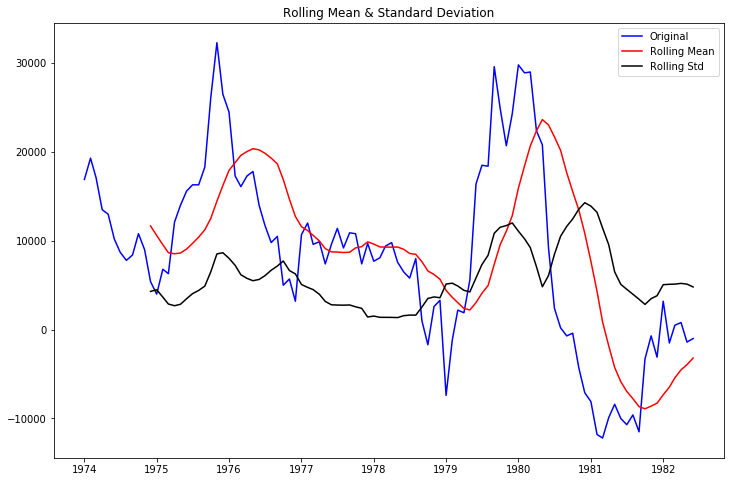

Results of Dickey-Fuller Test:
Test Statistic                 -2.469741
p-value                         0.123011
#Lags Used                      3.000000
Number of Observations Used    98.000000
Critical Value (1%)            -3.498910
Critical Value (5%)            -2.891516
Critical Value (10%)           -2.582760
dtype: float64


In [31]:
df['seasonal_difference'] = df.riders - df.riders.shift(12)  
test_stationarity(df.seasonal_difference.dropna(inplace = False))

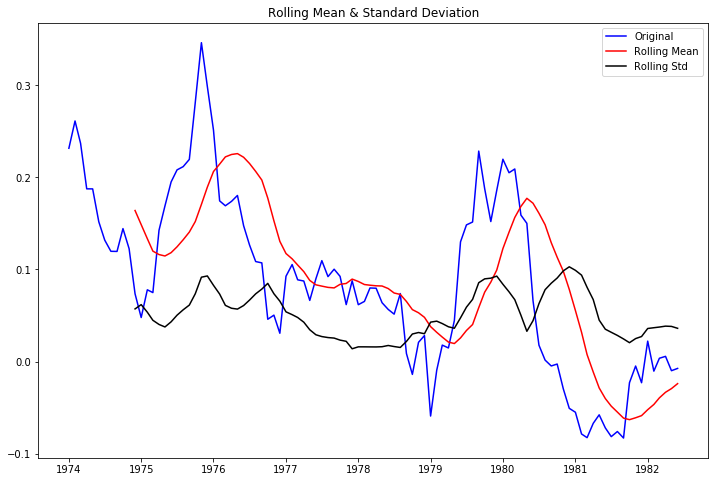

Results of Dickey-Fuller Test:
Test Statistic                  -1.919681
p-value                          0.322860
#Lags Used                       0.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64


In [32]:
df['log_seasonal_difference'] = df.riders_log - df.riders_log.shift(12)  
test_stationarity(df.log_seasonal_difference.dropna(inplace = False))

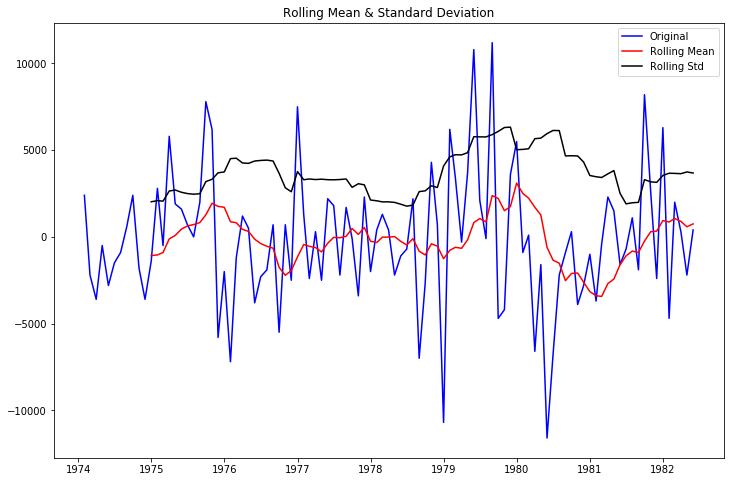

Results of Dickey-Fuller Test:
Test Statistic                -9.258520e+00
p-value                        1.427874e-15
#Lags Used                     0.000000e+00
Number of Observations Used    1.000000e+02
Critical Value (1%)           -3.497501e+00
Critical Value (5%)           -2.890906e+00
Critical Value (10%)          -2.582435e+00
dtype: float64


In [33]:
df['seasonal_first_difference'] = df.first_difference - df.first_difference.shift(12)  
test_stationarity(df.seasonal_first_difference.dropna(inplace = False))

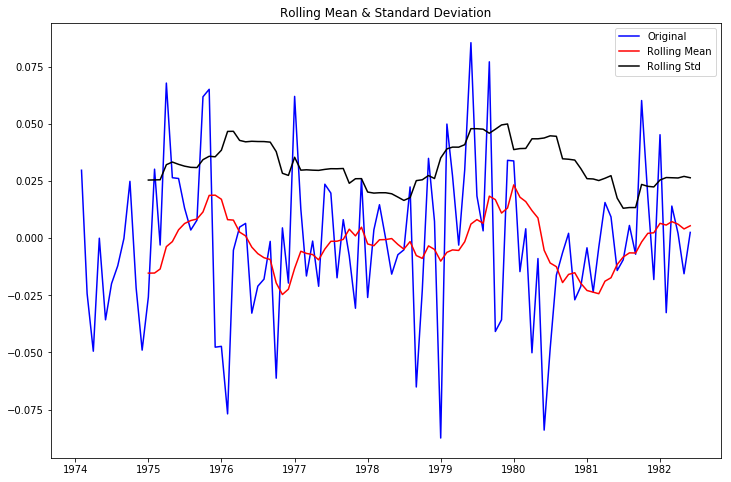

Results of Dickey-Fuller Test:
Test Statistic                -8.882112e+00
p-value                        1.309452e-14
#Lags Used                     0.000000e+00
Number of Observations Used    1.000000e+02
Critical Value (1%)           -3.497501e+00
Critical Value (5%)           -2.890906e+00
Critical Value (10%)          -2.582435e+00
dtype: float64


In [34]:
df['log_seasonal_first_difference'] = df.log_first_difference - df.log_first_difference.shift(12)  
test_stationarity(df.log_seasonal_first_difference.dropna(inplace=False))

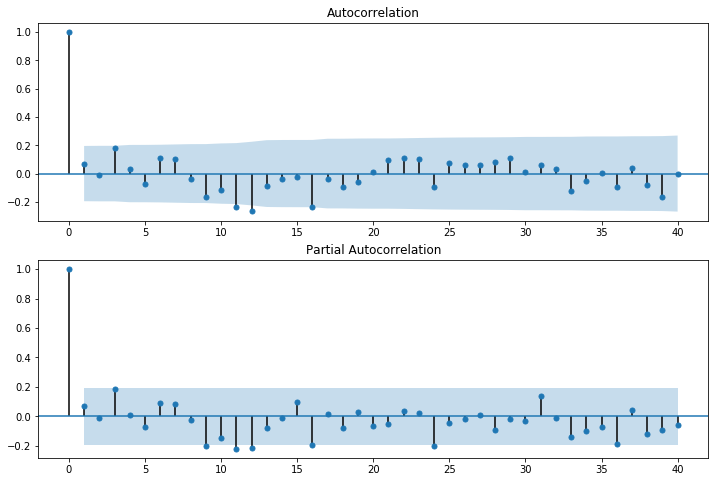

In [35]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.seasonal_first_difference.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.seasonal_first_difference.iloc[13:], lags=40, ax=ax2)

The Autocrrelation function is a function of how correlated the series is with a lagged version 
of itself with respect to the number of lags. IN the diagrams above, the x-axis represents the
lag and the y-axis is the correlation.
The Partial Autocorrelation Function is similar but controls for the smaller lags.
These two functions help to pick the parameters for the ARIMA model.

If the PACF function displays a sharp drop after a certain lag and the ACF shows a gradual 
decline then this suggests an AR term is needed, who's value is determined by the lag where the
large drop off occurs.
If the ACF displays a large drop off after a certain lag and/or the lag-1 ACF is negative then 
this suggests an MA term is needed, who's value is determined by the lag where the large drop
off occurs.
The value of d is the number of times that the original series needs to be differenced in order to become stationary.

In [37]:
mod = sm.tsa.statespace.SARIMAX(df.riders, trend = 'n', order = (0,1,0), seasonal_order = (0,1,1,12))
results = mod.fit()
print (results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                             riders   No. Observations:                  114
Model:             SARIMAX(0, 1, 0)x(0, 1, 1, 12)   Log Likelihood                -976.135
Date:                            Tue, 27 Mar 2018   AIC                           1956.271
Time:                                    14:25:33   BIC                           1961.743
Sample:                                01-01-1973   HQIC                          1958.492
                                     - 06-01-1982                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.1377      0.050     -2.757      0.006      -0.236      -0.040
sigma2      1.424e+07   2.62e-10   

In [38]:
mod = sm.tsa.statespace.SARIMAX(df.riders, trend ='n', order = (0,1,0), seasonal_order = (1,1,1,12))
results = mod.fit()
print (results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                             riders   No. Observations:                  114
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -970.257
Date:                            Tue, 27 Mar 2018   AIC                           1946.514
Time:                                    14:26:32   BIC                           1954.723
Sample:                                01-01-1973   HQIC                          1949.845
                                     - 06-01-1982                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5590      0.084      6.679      0.000       0.395       0.723
ma.S.L12      -0.9981      0.117   

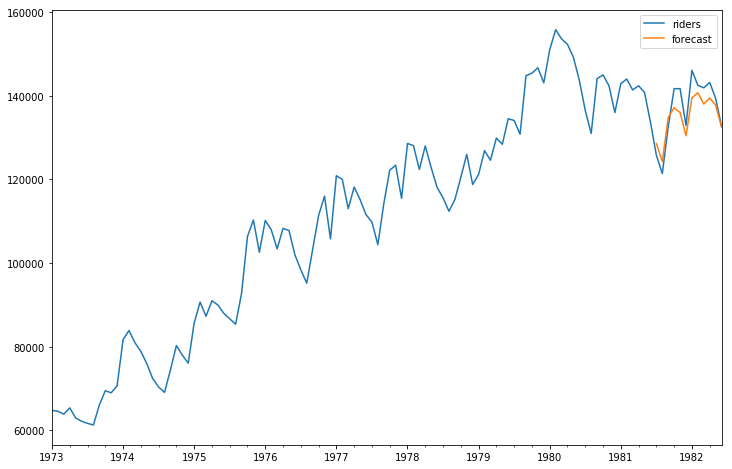

In [39]:
df['forecast'] = results.predict(start = 102, end = 114, dynamic = True)  
df[['riders', 'forecast']].plot(figsize = (12, 8)) 
plt.savefig('ts_df_predict.png', bbox_inches = 'tight')

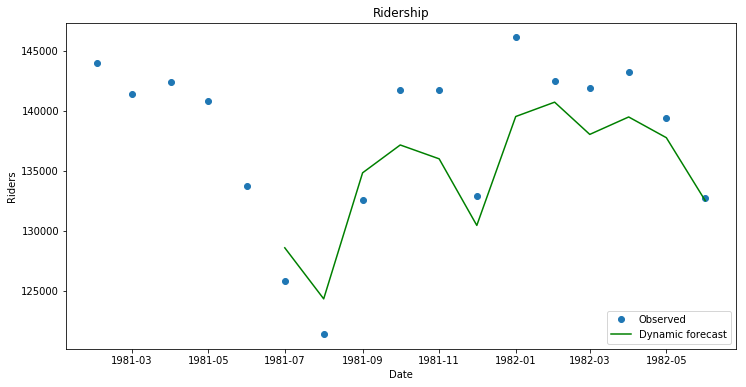

In [43]:
npredict = df.riders['1982'].shape[0]
fig, ax = plt.subplots(figsize = (12,6))
npre = 12
ax.set(title = 'Ridership', xlabel = 'Date', ylabel = 'Riders')
ax.plot(df.index[-npredict-npre+1:], df.ix[-npredict-npre+1:, 'riders'], 'o', label = 'Observed')
ax.plot(df.index[-npredict-npre+1:], df.ix[-npredict-npre+1:, 'forecast'], 'g', label = 'Dynamic forecast')
legend = ax.legend(loc='lower right')
legend.get_frame().set_facecolor('w')
plt.savefig('ts_predict_compare.png', bbox_inches = 'tight')

In [44]:
start = datetime.datetime.strptime("1982-07-01", "%Y-%m-%d")
date_list = [start + relativedelta(months = x) for x in range(0,12)]
future = pd.DataFrame(index = date_list, columns = df.columns)
df = pd.concat([df, future])

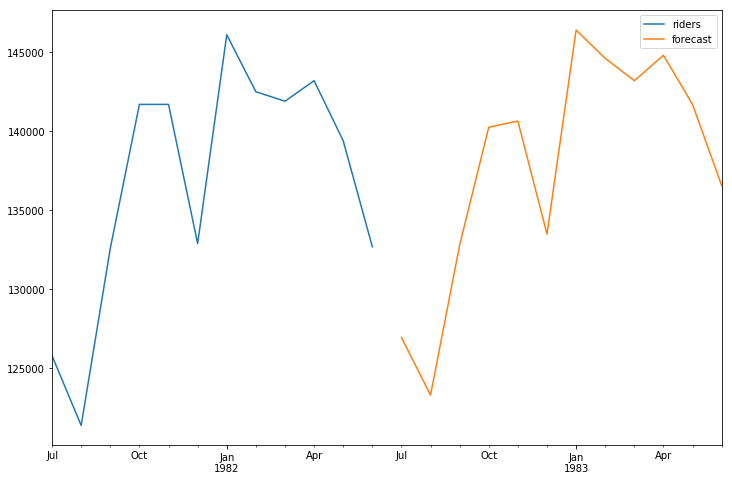

In [46]:
df['forecast'] = results.predict(start = 114, end = 125, dynamic = True)  
df[['riders', 'forecast']].iloc[-24:].plot(figsize = (12, 8)) 
plt.savefig('ts_predict_future.png', bbox_inches ='tight')